In [1]:
## XGBoost of ictal cases w.r.t. 4 and 5 classes
## Original data 1 vs. 4 and 1 vs. 5 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

In [5]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [6]:
eeg_14 = pd.read_csv("data_14.csv")

In [7]:
eeg_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [8]:
Y = list(eeg_14.pop('y'))

In [9]:
X = eeg_14.values

In [10]:
X.shape

(4600, 178)

In [11]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=0)

In [12]:
# Training on XGBoost Classifier
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
# Prediction on XGBoost Classifier
pred = model.predict(X_test)
prediction = [round(value) for value in pred]

In [14]:
print("Accuracy_XGBoost")
accuracy = accuracy_score(Y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(metrics.accuracy_score(Y_test, prediction))

Accuracy_XGBoost
Accuracy: 96.11%
0.961133069829


In [15]:
len(X_test)

1518

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
confusion = confusion_matrix(Y_test, prediction, labels = [0, 1])

In [17]:
print(confusion)

[[739   5]
 [ 54 720]]


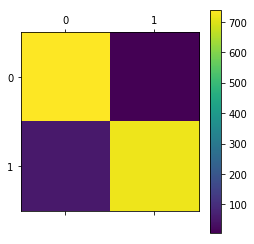

In [18]:
plt.matshow(confusion)
plt.colorbar()
plt.show()

In [19]:
Y_pred_prob = model.predict_proba(X_test)

Text(0,0.5,'Frequency')

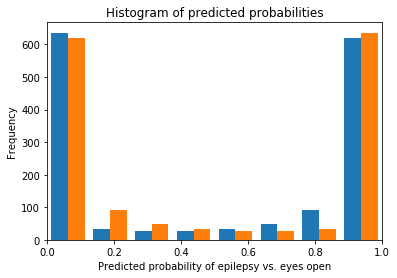

In [20]:
# histogram of predicted probabilities
plt.hist(Y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy vs. eyes open')
plt.ylabel('Frequency')

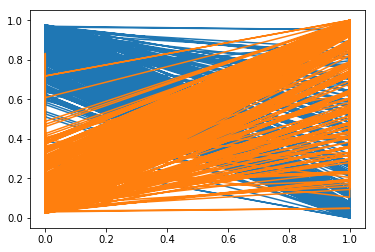

In [21]:
plt.plot(Y_test, Y_pred_prob)

In [40]:
# Random Forest Classifier on the data
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Instantiating Random Forest model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [25]:
# Training by Random Forest on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
# Predictions
predict = rf.predict(X_test)

In [27]:
errors = abs(predict - Y_test)

In [28]:
# Mean Absolute Error (MAE)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


In [31]:
mape = 100 * (errors)

In [32]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.47 %.


In [ ]:
# XGBoost is better Classifier than Random Forest for this data

In [23]:
# This data is Class 1 vs Class 5 : 1 -> epileptic case, 5 -> eyes closed case
eeg_15 = pd.read_csv("data_15.csv")

In [24]:
eeg_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [25]:
Y1 = list(eeg_15.pop('y'))

In [26]:
X1 = eeg_15.values

In [27]:
X1.shape

(4600, 178)

In [28]:
# Cross Validation split
test_size = 0.33
X1_train, X1_test, Y1_train, Y1_test = cross_validation.train_test_split(X1, Y1, test_size=test_size, random_state=0)

In [29]:
model.fit(X1_train, Y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
pred1 = model.predict(X1_test)
prediction1 = [round(value) for value in pred1]

In [31]:
print("Accuracy_XGBoost")
accuracy = accuracy_score(Y1_test, prediction1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(metrics.accuracy_score(Y1_test, prediction1))

Accuracy_XGBoost
Accuracy: 98.95%
0.989459815547


In [33]:
len(X1_test)

1518

In [32]:
confusion1 = confusion_matrix(Y1_test, prediction, labels = [0, 1])

In [34]:
print(confusion1)

[[739   5]
 [ 54 720]]


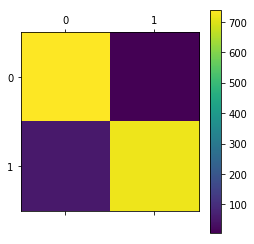

In [35]:
plt.matshow(confusion1)
plt.colorbar()
plt.show()

In [36]:
Y1_pred_prob = model.predict_proba(X1_test)

Text(0,0.5,'Frequency')

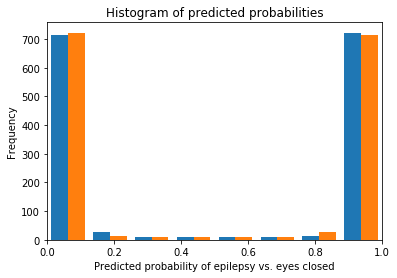

In [37]:
# histogram of predicted probabilities
plt.hist(Y1_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy vs. eyes closed')
plt.ylabel('Frequency')

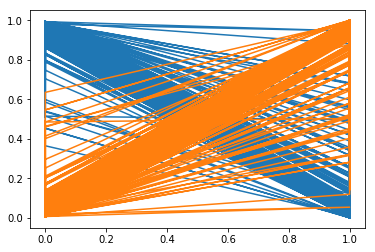

In [38]:
plt.plot(Y1_test, Y1_pred_prob)

In [42]:
# Random Forest Classifier on Cross validation split with same values of estimators and Random state
rf.fit(X1_train, Y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
predict1 = rf.predict(X1_test)

In [44]:
errors1 = abs(predict1 - Y1_test)
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')

Mean Absolute Error: 0.06 degrees.


In [45]:
mape1 = 100 * (errors1)
accuracy1 = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy1, 2), '%.')

Accuracy: 94.02 %.


In [ ]:
# Comment: XGBoost again scores better than Random Forest in predictions